# Password Strength Classification

Using different ML classification Algorithms:
1. Logistic regression(Multiclass-ovr)
2. XGBoost
3. Random Forest Regressor

In [1]:
import pandas as pd
import numpy as np
import warnings

In [2]:
df=pd.read_csv('data.csv',',',error_bad_lines=False)
warnings.filterwarnings(action='ignore')

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

b'Skipping line 525174: expected 2 fields, saw 5\nSkipping line 526251: expected 2 fields, saw 5\nSkipping line 529611: expected 2 fields, saw 5\nSkipping line 531398: expected 2 fields, saw 5\nSkipping line 534146: expected 2 fields, saw 5\nSkipping line 544954: expected 2 fields, saw 5\nSkipping line 553002: expected 2 fields, saw 5\nSkipping line 553883: expected 2 fields, saw 5\nSkipping line 553887: expected 2 fields, saw 5\nSkipping line 553915: expected 2 fields, saw 5\nSkipping line 554172: expected 2 fields, saw 5\nSkipping line 563534: expected 2 fields, saw 5\nSkipping line 565191: expected 2 fields, saw 5\nSkipping line 574108: expected 2 fields, saw 5\nSkipping line 574412: expected 2 fields, saw 5\nSkipping line 575985: expected 2 fields, saw 5\nSkipping line 580091: expected 2 fields, saw 5\nSkipping line 582682: expected 2 fields, saw 5\nSkipping line 585885: expected 2 fields, saw 5\nSkipping line 590171: expected 2 fields, saw 5\nSkipping line 591924: expected 2 field

In [3]:
# Check the nunber of feautures and observations
df.shape

(669640, 2)

In [4]:
#Check for null values
df.isnull().sum()

password    1
strength    0
dtype: int64

In [5]:
# Check which value in the dataset is null
df[df['password'].isnull()]

,password,strength
367579,NaN,0


In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

password    0
strength    0
dtype: int64

In [8]:
df.strength.unique()

array([1, 2, 0])

In [9]:
df[df.strength==0].head()

,password,strength
21,intel1,0
35,lsdlsd1,0
44,olmaz.,0
50,ok>bdk,0
58,d04m11,0


In [10]:
df[df.strength==1].head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [11]:
df[df.strength==2].head()

,password,strength
5,AVYq1lDE4MgAZfNt,2
13,WUt9IZzE0OQ7PkNE,2
20,elyass15@ajilent-ci,2
22,klara-tershina3H,2
41,pHyqueDIyNQ8vmhb,2


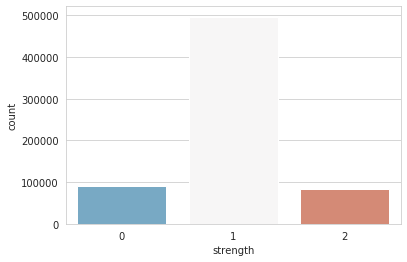

In [12]:

import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(x='strength',data=df,palette='RdBu_r')

In [13]:
passwords_tuple=np.array(df)
import random
random.shuffle(passwords_tuple) #shuffling randomly for robustness

In [64]:
y=[labels[1] for labels in passwords_tuple]
y[:10]

[1, 1, 1, 1, 1, 1, 2, 1, 1, 1]

In [63]:
X=[labels[0] for labels in passwords_tuple]
X[:10]

['kzde5577',
 'kino3434',
 'visi7k1yr',
 'megzy123',
 'megzy123',
 'kzde5577',
 'AVYq1lDE4MgAZfNt',
 'u6c8vhow',
 'u6c8vhow',
 'v1118714']

In [16]:
# Function to divide each password into an array of multiple characters, so that we can use the array to vectorize
# it later using text frequency inverse document frequency(TfidfVectorizer)
def word_divide_char(inputs):
    characters=[]
    for i in inputs:
        characters.append(i)
    return characters

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)

In [18]:
# Using TfidfVectorizer to convert each password into a vector which then can be used for training
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(tokenizer=word_divide_char)
X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

In [19]:
X_train.shape

(535711, 124)

In [20]:
X_test.shape

(133928, 124)

In [21]:
vectorizer.vocabulary_

{'v': 69,
 'e': 52,
 'd': 51,
 'i': 56,
 'p': 63,
 'u': 68,
 '7': 33,
 '8': 34,
 '0': 26,
 'j': 57,
 'o': 62,
 'a': 48,
 '2': 28,
 '5': 31,
 'h': 55,
 '4': 30,
 '1': 27,
 '3': 29,
 'g': 54,
 '6': 32,
 'm': 60,
 'z': 73,
 '9': 35,
 'x': 71,
 'f': 53,
 'c': 50,
 's': 66,
 'l': 59,
 't': 67,
 'n': 61,
 'w': 70,
 'y': 72,
 'r': 65,
 'b': 49,
 'q': 64,
 'k': 58,
 '!': 13,
 '.': 24,
 '@': 41,
 '*': 21,
 '-': 23,
 '^': 45,
 '$': 16,
 '&': 18,
 '_': 46,
 '#': 15,
 ';': 36,
 '=': 38,
 '¨': 83,
 ']': 44,
 '[': 42,
 '}': 76,
 '(': 19,
 '>': 39,
 '%': 17,
 '/': 25,
 '?': 40,
 'õ': 113,
 '|': 75,
 '~': 77,
 ')': 20,
 ' ': 12,
 '+': 22,
 '\\': 43,
 'þ': 121,
 'ä': 101,
 '±': 87,
 '<': 37,
 '\x7f': 78,
 'å': 102,
 'ÿ': 122,
 '²': 88,
 'é': 106,
 '\x06': 2,
 '`': 47,
 '³': 89,
 '\x16': 6,
 'ó': 111,
 'ò': 110,
 '·': 92,
 '\x1e': 11,
 'û': 118,
 '«': 84,
 '÷': 115,
 'à': 98,
 '\x12': 5,
 '{': 74,
 'ö': 114,
 '\x1c': 10,
 '‚': 123,
 'ú': 117,
 '\x05': 1,
 '\x1b': 9,
 'ý': 120,
 '°': 86,
 'ð': 108,
 'â':

In [22]:
# X_train is stored as a sparse matrix because it contains a very large number of zeroes.
X_train

<535711x124 sparse matrix of type '<class 'numpy.float64'>'
	with 4515784 stored elements in Compressed Sparse Row format>

In [23]:
len(vectorizer.get_feature_names())

124

In [24]:
feature_names = vectorizer.get_feature_names()
 
#get tfidf vector for first document
first_document_vector=X_train[0]
 
#print the scores
df_new= pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df_new.sort_values(by=["tfidf"],ascending=False)

,tfidf
v,0.404788
p,0.369722
7,0.352415
8,0.343328
d,0.340141
...,...
=,0.000000
<,0.000000
;,0.000000
9,0.000000


# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
# Using a multi_class(ovr- one vs rest) logistic regressor because we have 3 classes(0,1 and 2).
log_class=LogisticRegression(penalty='l2',multi_class='ovr')
warnings.filterwarnings(action='ignore')
log_class.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
print(log_class.score(X_test,y_test))

0.813362403679589


In [28]:
X_predict=np.array(["%@123abcd"])
X_predict=vectorizer.transform(X_predict)
y_pred=log_class.predict(X_predict)
print(y_pred)

[2]


# Reducing Data size(no. of rows)

Reducing size of data to a fraction of its size (originally it has around 7,00,000 rows), so that we can use xgboost
and svm algorithms on it in a timely manner.
Note: If we won't reduce the size of the dataset then it will consume large amount of space and will take lots of time during training  with svm.

In [29]:
df

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
...,...,...
669635,10redtux10,1
669636,infrared1,1
669637,184520socram,1
669638,marken22a,1


In [30]:
df_chunk=df.sample(n=10000).reset_index()

In [31]:
df_chunk

,index,password,strength
0,377161,o6cw0dpe,1
1,426738,nathaniel789,1
2,232455,rawyj490,1
3,48329,kaomd4838,1
4,300026,asutenan123,1
...,...,...,...
9995,453918,mydude268,1
9996,517560,jannah7070,1
9997,144700,utoqodanos876,1
9998,646820,pardo1,0


In [32]:
df_chunk.drop(['index'],axis=1,inplace=True)
df_chunk

,password,strength
0,o6cw0dpe,1
1,nathaniel789,1
2,rawyj490,1
3,kaomd4838,1
4,asutenan123,1
...,...,...
9995,mydude268,1
9996,jannah7070,1
9997,utoqodanos876,1
9998,pardo1,0


In [33]:
df_chunk.isnull().sum()

password    0
strength    0
dtype: int64

In [34]:
#passwords_tuple_chunk=np.array(df_chunk)
#import random
#random.shuffle(passwords_tuple_chunk) #shuffling randomly for robustness

In [35]:
#y_chunk=[labels[1] for labels in passwords_tuple_chunk]
#y

In [36]:
#X_chunk=[labels[0] for labels in passwords_tuple_chunk]
#X_chunk

In [37]:
X_chunk=df_chunk.password.values
y_chunk=df_chunk.strength.values

In [38]:
print(y_chunk.size)
print(X_chunk.size)

10000
10000


In [39]:
from sklearn.model_selection import train_test_split
X_chunk_train, X_chunk_test, y_chunk_train, y_chunk_test = train_test_split(X_chunk, y_chunk, test_size=0.20, random_state=4)

In [40]:
X_chunk_test.shape
X_chunk_train.shape

(8000,)

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_chunk=TfidfVectorizer(tokenizer=word_divide_char)
X_chunk_train=vectorizer_chunk.fit_transform(X_chunk_train)
X_chunk_test=vectorizer_chunk.transform(X_chunk_test)

In [42]:
X_chunk_train

<8000x62 sparse matrix of type '<class 'numpy.float64'>'
	with 67307 stored elements in Compressed Sparse Row format>

In [43]:
X_chunk_test

<2000x62 sparse matrix of type '<class 'numpy.float64'>'
	with 16864 stored elements in Compressed Sparse Row format>

# SVM

In [51]:
from sklearn import svm
svm_classifier=svm.SVC(kernel='linear',C=100)
svm_classifier.fit(X_chunk_train,y_chunk_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [52]:
svm_classifier.score(X_chunk_test,y_chunk_test)

0.8255

In [53]:
#hyperparameter tuning
C=[1e-05,1e-02,10,1e2,1e3]
kernel=['linear','poly','rbf']
for c in C :
    for k in kernel:
        svm_classifier=svm.SVC(kernel=k,C=c) #play with the parameters to find the best model
        svm_classifier.fit(X_chunk_train,y_chunk_train)
        print("KERNEL:"+ k)
        print("C:"+str(c))
        print(svm_classifier.score(X_chunk_test,y_chunk_test))

KERNEL:linear
C:1e-05
0.749
KERNEL:poly
C:1e-05
0.749
KERNEL:rbf
C:1e-05
0.749
KERNEL:linear
C:0.01
0.749
KERNEL:poly
C:0.01
0.749
KERNEL:rbf
C:0.01
0.749
KERNEL:linear
C:10
0.823
KERNEL:poly
C:10
0.7985
KERNEL:rbf
C:10
0.828
KERNEL:linear
C:100.0
0.8255
KERNEL:poly
C:100.0
0.795
KERNEL:rbf
C:100.0
0.817
KERNEL:linear
C:1000.0
0.8255
KERNEL:poly
C:1000.0
0.795
KERNEL:rbf
C:1000.0
0.817


In [56]:
svm_classifier=svm.SVC(kernel='rbf',C=10)
svm_classifier.fit(X_chunk_train,y_chunk_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [59]:
test_svm=[['@123abcd','abc@d','qwerta!@sdf','qwsx@!','ibmintel','!qaws@sd3#cf$','aszxq!~werdfcv','aszx','uytr@!','!2#j']]
for test in test_svm:
    test=vectorizer_chunk.transform(test)
    prediction=svm_classifier.predict(test)
    print(prediction)

[1 1 2 1 1 2 2 1 1 0]


# XGBoost

In [60]:
import xgboost as xgb
xgb_classifier=xgb.XGBClassifier()
xgb_classifier.fit(X_chunk_train,y_chunk_train)
warnings.filterwarnings(action='ignore')

[18:25:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [61]:
xgb_classifier.score(X_chunk_test,y_chunk_test)

0.9435

In [ ]:
# Note: here, we are not doing hyperparamter tuning, as it's a huge dataset so doing hyperparamter tuning will take 
# a huge amount of time, and even without the hyperparamter tuning we are getting quite good accuracy of around 0.94.

# Hyperparamter Tuning
#from sklearn.model_selection import RandomizedSearchCV

#Randomized Search CV

# Number of estimators
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1200, num = 6)]
# Various learning rate parameters
#learning_rate = ['0.05','0.1', '0.2','0.3','0.5']
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
#Subssample parameter values
#subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
#min_child_weight=[3,4,5,6,7]

# Create the random grid
#random_grid = {'n_estimators': n_estimators,
#               'learning_rate': learning_rate,
#               'max_depth': max_depth,
#               'subsample': subsample,
#              'min_child_weight': min_child_weight}
#
#print(random_grid)

#xg_random = RandomizedSearchCV(estimator = xgb_classifier, param_distributions = \
#                               random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

#xg_random.fit(X_chunk_train,y_chunk_train)

In [62]:
test=[['%@123abcd','abcd','qwertasdf','qwsx@!','ibmintel','!qaws@sd3#cf$','aszxqwerdfcv','aszx','uytr@!','!2#j']]
for test in test:
    test=vectorizer_chunk.transform(test)
    prediction=xgb_classifier.predict(test)
    print(prediction)

[2 0 1 1 0 2 1 0 1 1]


# Conclusion

Out of the algorithms that I used for classification,
1. XGBoost Classifier performed the best with an accuracy score of around, 
2. followed by Random Forest Classifier which gave an accuracy of around 0.823 (with parameters, kernel='rbf' and 
    C=10)
3. and multi class logistic regression performed the worst with a score of around 0.81.